In [33]:
!pip install autogluon



In [113]:
# imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split


# AutoGluon Regression: Predicting Loan Amount

In this notebook, we will use AutoGluon to build a regression model that predicts the `LoanAmount` based on various features such as `ApplicantIncome_Annual`, `CoapplicantIncome_Annual`, and others. 

AutoGluon automatically handles model selection, hyperparameter tuning, and training with minimal code. The goal is to predict the loan amount requested by the applicant using the available data.


## Data Definitions

The dataset consists of various features, including:
- **`ApplicantIncome_Annual`**: The annual income of the applicant.
- **`CoapplicantIncome_Annual`**: The annual income of the coapplicant.
- **`LoanAmount`**: The target column representing the loan amount requested by the applicant.

In this notebook, we will predict the `LoanAmount` using the available features in the dataset.


##  Model Building 

In [115]:
# imports
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd

Load the Dataset

In [117]:

loan_data_path = r'C:\Users\mmuib\Loan_Approval_f.csv'  
data = pd.read_csv(loan_data_path)

Checking Dataset Structures/EDA

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Married                   614 non-null    object 
 1   Dependents                614 non-null    int64  
 2   Education                 614 non-null    object 
 3   Self_Employed             614 non-null    object 
 4   ApplicantIncome_Annual    614 non-null    int64  
 5   CoapplicantIncome_Annual  614 non-null    float64
 6   TotalFamilyIncome_Annual  614 non-null    float64
 7   LoanAmount                614 non-null    int64  
 8   Loan_Amount_Term_Year     614 non-null    int64  
 9   Credit_History            614 non-null    object 
 10  Property_Area             614 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 52.9+ KB


In [121]:
data.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome_Annual', 'CoapplicantIncome_Annual',
       'TotalFamilyIncome_Annual', 'LoanAmount', 'Loan_Amount_Term_Year',
       'Credit_History', 'Property_Area'],
      dtype='object')

Check for Nulls

In [123]:
data.isna().sum()

Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome_Annual      0
CoapplicantIncome_Annual    0
TotalFamilyIncome_Annual    0
LoanAmount                  0
Loan_Amount_Term_Year       0
Credit_History              0
Property_Area               0
dtype: int64

In [125]:
# Ensure 'LoanAmount' is numeric, coerce errors to NaN and drop rows with NaN values
data['LoanAmount'] = pd.to_numeric(data['LoanAmount'], errors='coerce')
data.dropna(subset=['LoanAmount'], inplace=True)

In [127]:
# Convert the dataframe to TabularDataset (AutoGluon format)
loan_tabular = TabularDataset(data)

In [129]:
# Display the first few rows of the dataset
loan_tabular.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome_Annual,CoapplicantIncome_Annual,TotalFamilyIncome_Annual,LoanAmount,Loan_Amount_Term_Year,Credit_History,Property_Area
0,No,0,Graduate,No,58490,0.0,58490.0,120000,6,Yes,Urban
1,Yes,1,Graduate,No,45830,15080.0,60910.0,128000,6,Yes,Rural
2,Yes,0,Graduate,Yes,30000,0.0,30000.0,66000,6,Yes,Urban
3,Yes,0,Not Graduate,No,25830,23580.0,49410.0,120000,6,Yes,Urban
4,No,0,Graduate,No,60000,0.0,60000.0,141000,6,Yes,Urban


Prepare Data

In [132]:
data = data.copy()

In [134]:
data['LoanAmount'].value_counts()

LoanAmount
120000    22
110000    17
100000    15
187000    12
160000    12
          ..
72000      1
240000     1
214000     1
59000      1
253000     1
Name: count, Length: 207, dtype: int64

In [136]:
data['LoanAmount'].value_counts()/data.shape[0]

LoanAmount
120000    0.035831
110000    0.027687
100000    0.024430
187000    0.019544
160000    0.019544
            ...   
72000     0.001629
240000    0.001629
214000    0.001629
59000     0.001629
253000    0.001629
Name: count, Length: 207, dtype: float64

Split the data into train and test sets

In [139]:
# Remove classes that occur less than twice
value_counts = data['LoanAmount'].value_counts()
valid_classes = value_counts[value_counts >= 2].index
filtered_data = data[data['LoanAmount'].isin(valid_classes)]

# Train Test Split
train_df, test_df = train_test_split(
    filtered_data, test_size=0.5, random_state=42, stratify=filtered_data['LoanAmount']
)

In [143]:
train_df['LoanAmount'].value_counts()/train_df.shape[0]

LoanAmount
120000    0.042146
110000    0.030651
100000    0.026820
187000    0.022989
160000    0.022989
            ...   
40000     0.003831
216000    0.003831
109000    0.003831
87000     0.003831
86000     0.003831
Name: count, Length: 116, dtype: float64

In [145]:
# Create the predictor and fit the data
predictor = TabularPredictor(label='LoanAmount', path='TotalFamilyIncome_Annual')

In [147]:
# observe the output
predictor.fit(train_df)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       1.88 GB / 15.68 GB (12.0%)
Disk Space Avail:   743.61 GB / 952.80 GB (78.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference speed.
	presets='good'         : Good accur

In [149]:
# summary
predictor.fit_summary()

C:\Users\mmuib\anaconda3\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


*** Summary of fit() ***
Estimated performance of each model:
                  model     score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -42620.404721  root_mean_squared_error       0.085774   5.014682                0.000000           0.016858            2       True         11
1            LightGBMXT -43599.449324  root_mean_squared_error       0.011093   0.373071                0.011093           0.373071            1       True          3
2               XGBoost -44065.121806  root_mean_squared_error       0.008032   0.454339                0.008032           0.454339            1       True          9
3       NeuralNetFastAI -44617.122252  root_mean_squared_error       0.031698   4.157384                0.031698           4.157384            1       True          8
4         LightGBMLarge -45812.603740  root_mean_squared_error       0.009382   0.931563               

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -45963.841408014756,
  'KNeighborsDist': -52627.66979529747,
  'LightGBMXT': -43599.44932416257,
  'LightGBM': -46118.71278463058,
  'RandomForestMSE': -51851.603108692536,
  'CatBoost': -46443.1294585451,
  'ExtraTreesMSE': -51638.26598632675,
  'NeuralNetFastAI': -44617.12225187497,
  'XGBoost': -44065.121806476025,
  'LightGBMLarge': -45812.603740494465,
  'WeightedEnsemble_L2': -42620.404720581755},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighborsUnif'],
  'KNeighborsDist': ['KNeighborsDist'],
  'LightGBMXT': ['LightGBMXT'],
  'Li

In [151]:
test_df.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome_Annual', 'CoapplicantIncome_Annual',
       'TotalFamilyIncome_Annual', 'LoanAmount', 'Loan_Amount_Term_Year',
       'Credit_History', 'Property_Area'],
      dtype='object')

Prediction

In [154]:
# validate the model against unseen data
y_test = test_df['LoanAmount']
test_data = test_df.drop(columns=['LoanAmount'])

In [156]:
y_pred = predictor.predict(test_data)

C:\Users\mmuib\anaconda3\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


Evaluation

In [159]:
metrics = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

In [161]:
# Using absolute values for rmse, mse, and median absolute error

absolute_metrics = {key:abs(value) for key, value in metrics.items()}
absolute_metrics

{'root_mean_squared_error': 51065.14402923727,
 'mean_squared_error': 2607648934.726747,
 'mean_absolute_error': 30475.769233062976,
 'r2': 0.18717419134411684,
 'pearsonr': 0.43375365252243825,
 'median_absolute_error': 20954.765625}

In [163]:
# Feature Importance
importance = predictor.feature_importance(test_df)
importance

Computing feature importance via permutation shuffling for 10 features using 262 rows with 5 shuffle sets...
C:\Users\mmuib\anaconda3\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
	9.01s	= Expected runtime (1.8s per shuffle set)
C:\Users\mmuib\anaconda3\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the saf

,importance,stddev,p_value,n,p99_high,p99_low
TotalFamilyIncome_Annual,5330.873788,997.797366,0.000141,5,7385.352355,3276.395221
ApplicantIncome_Annual,628.284991,1067.934134,0.129336,5,2827.176134,-1570.606152
CoapplicantIncome_Annual,203.676687,902.969927,0.320257,5,2062.904247,-1655.550872
Education,198.515695,199.164722,0.044866,5,608.598611,-211.567221
Loan_Amount_Term_Year,182.891438,153.472302,0.028057,5,498.893030,-133.110153
Married,111.510183,248.524679,0.186244,5,623.225931,-400.205565
Credit_History,7.524546,157.049100,0.459920,5,330.890812,-315.841721
Property_Area,-61.904865,59.893892,0.959035,5,61.417486,-185.227216
Dependents,-79.981302,567.621877,0.615772,5,1088.759988,-1248.722592
Self_Employed,-92.349695,435.483465,0.669954,5,804.316779,-989.016169


Testing/ Use Case

In [170]:
# Use Case!
# Adjust the lead times on the reservation, or another features and test!
res = {
      "Dependents": 1,
       "TotalFamilyIncome_Annual": 80000, 
       "LoanAmount": 120000,
       "Loan_Amount_Term_Year": 5,
       "Credit_History": 1,
       "Property_Area": 2
  
  }

Visualization

In [173]:
data['LoanAmount'].describe()

count       614.000000
mean     143151.465798
std       85965.155824
min        9000.000000
25%       98250.000000
50%      125000.000000
75%      164750.000000
max      700000.000000
Name: LoanAmount, dtype: float64

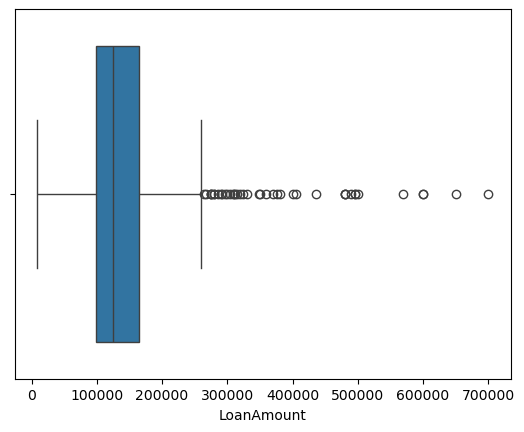

In [175]:
sns.boxplot(x=data['LoanAmount']);

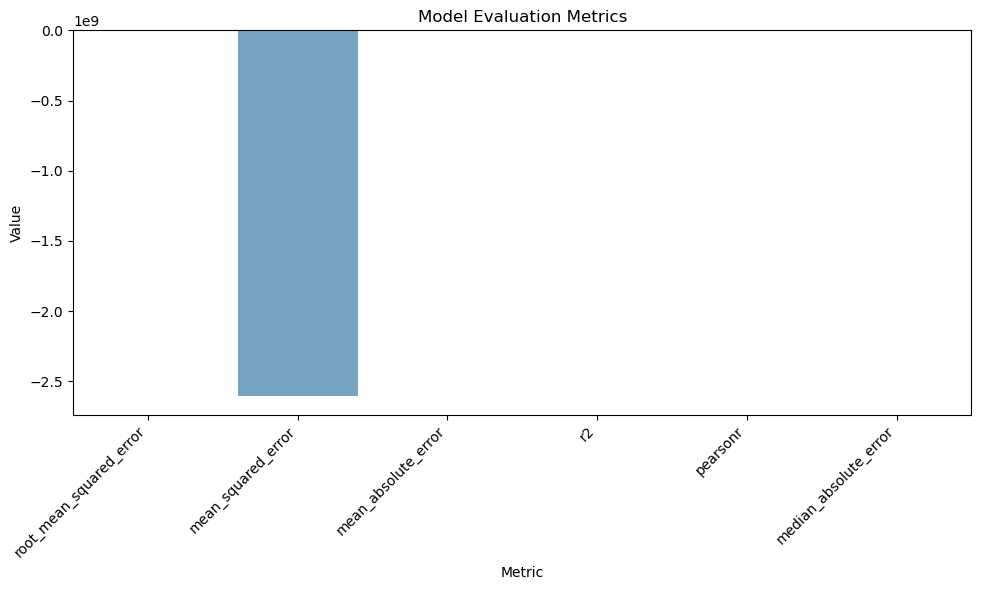

In [177]:
# Convert to DataFrame for plotting
df_metrics = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Create a bar plot (future-proofed)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x='Metric', y='Value', hue='Metric', palette='Blues_d', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Model Evaluation Metrics')
plt.tight_layout()
plt.show()

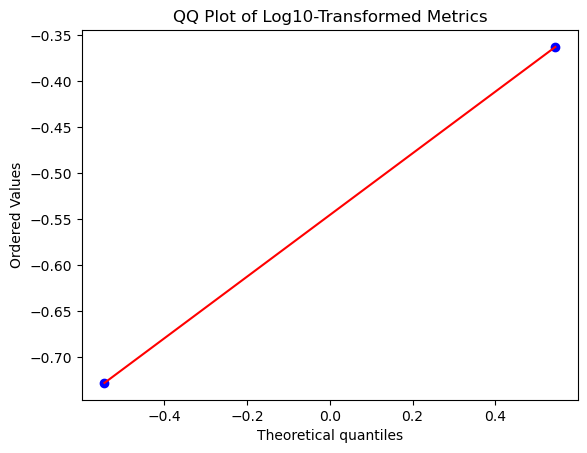

In [179]:
# Extract and log-transform values (skip non-positive)
metric_values = list(metrics.values())
log_metrics = np.log10([value for value in metric_values if value > 0])

# QQ plot
stats.probplot(log_metrics, dist="norm", plot=plt)
plt.title("QQ Plot of Log10-Transformed Metrics")
plt.show()

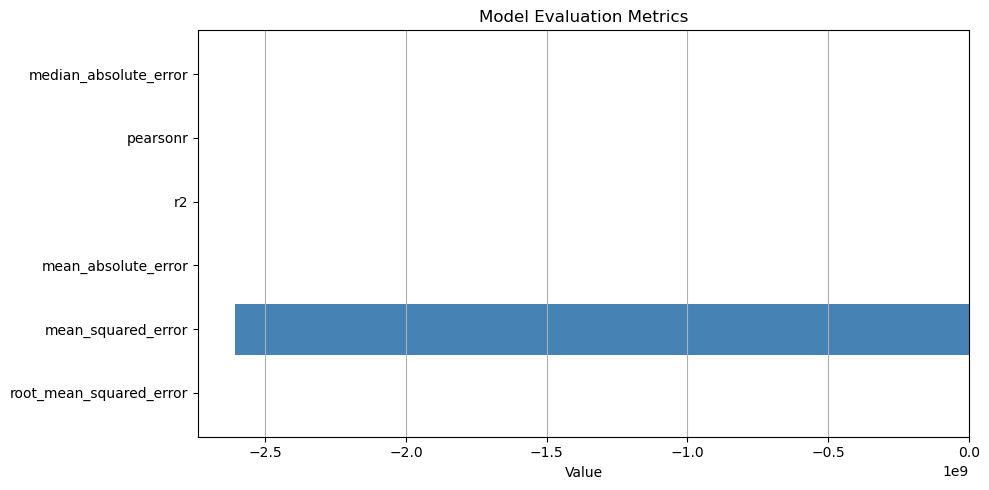

In [181]:
import matplotlib.pyplot as plt

# Names and values
metric_names = list(metrics.keys())
metric_vals = list(metrics.values())

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(metric_names, metric_vals, color='steelblue')
plt.title("Model Evaluation Metrics")
plt.xlabel("Value")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [183]:
# Save the model
loan_amount_predictor.save('loan_amount_predictor_model')

## Conclusion

In this notebook, we used AutoGluon to build a regression model that predicts the `LoanAmount` based on features like `ApplicantIncome_Annual`, `CoapplicantIncome_Annual`, etc. The model was evaluated using the test data, and its performance was assessed.

AutoGluon provided an easy and efficient way to train and evaluate the model with minimal manual effort. The model’s performance can be improved further by tuning hyperparameters or incorporating additional features.
